<a href="https://colab.research.google.com/github/WosberbonDesu/AI-ASSISTANT-lydiabot/blob/main/VeriKafasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/Klasörler')
%cd /Klasörler

Mounted at /Klasörler
/Klasörler


In [ ]:
import os
os.chdir("/Klasörler/MyDrive/gdrive/My-Drive")

In [ ]:
! ls

data  fer2013.csv  Untitled0.ipynb  utils  VeriKafasi.ipynb


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Conv2D,  Activation, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
from keras.callbacks import ModelCheckpoint

In [ ]:
root = "/Klasörler/MyDrive/gdrive/My-Drive/"

data = pd.read_csv(root+"fer2013.csv")
data.shape


(35887, 3)

In [ ]:
data.head(10)

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
5,2,55 55 55 55 55 54 60 68 54 85 151 163 170 179 ...,Training
6,4,20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...,Training
7,3,77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...,Training
8,3,85 84 90 121 101 102 133 153 153 169 177 189 1...,Training
9,2,255 254 255 254 254 179 122 107 95 124 149 150...,Training


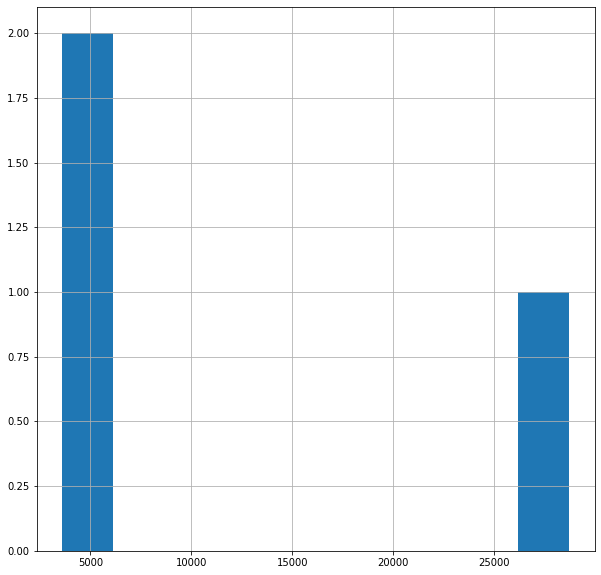

In [ ]:
k = data["Usage"].value_counts()
k.hist(figsize=(10,10))


In [ ]:
np.unique(data["Usage"].values.ravel())
print("Example values in dataset %d" %(len(data[data.Usage == "Training"])))

Example values in dataset 28709


In [ ]:
train_data  = data[data.Usage == "Training"]

In [ ]:
train_pixels = train_data.pixels.str.split(" ").tolist() 

train_pixels = pd.DataFrame(train_pixels, dtype=int)
train_images = train_pixels.values
train_images = train_images.astype(np.float)

print(train_images)

print(train_images.shape)

[[ 70.  80.  82. ... 106. 109.  82.]
 [151. 150. 147. ... 193. 183. 184.]
 [231. 212. 156. ...  88. 110. 152.]
 ...
 [ 74.  81.  87. ... 188. 187. 187.]
 [222. 227. 203. ... 136. 136. 134.]
 [195. 199. 205. ...   6.  15.  38.]]
(28709, 2304)


In [ ]:
import missingno as msno


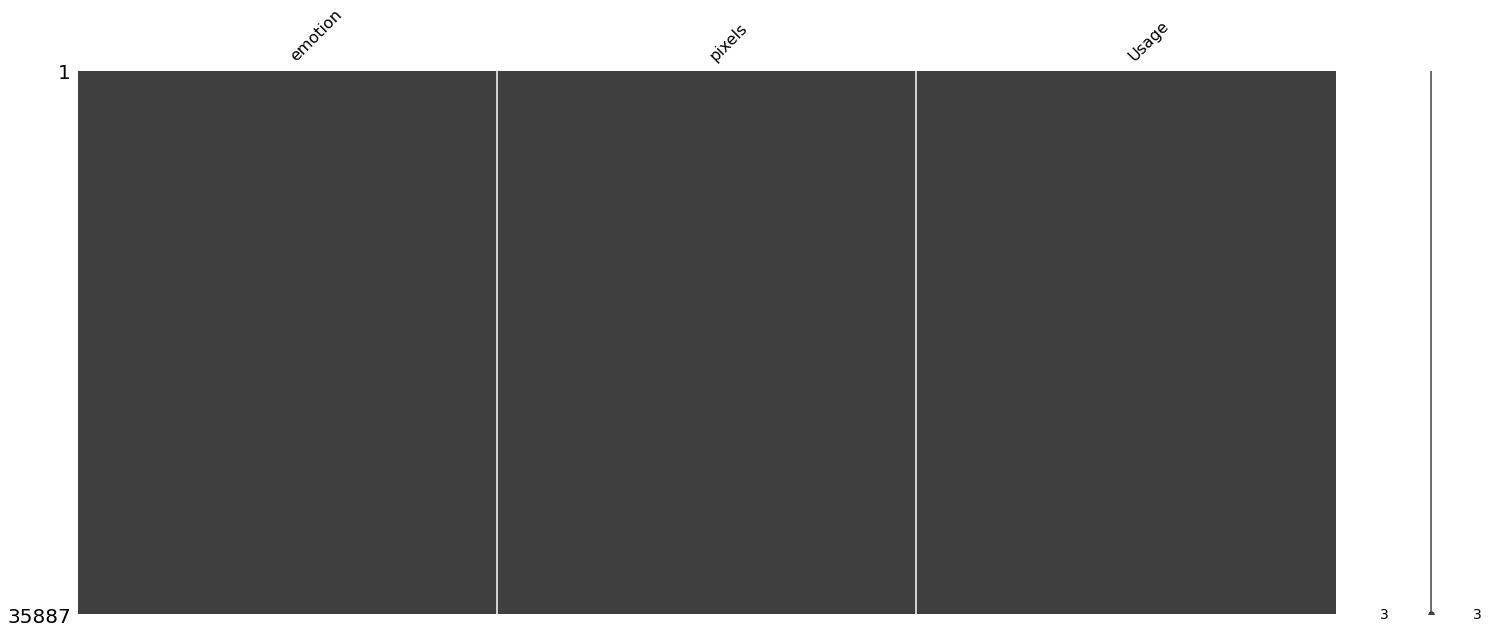

In [ ]:
msno.matrix(data)

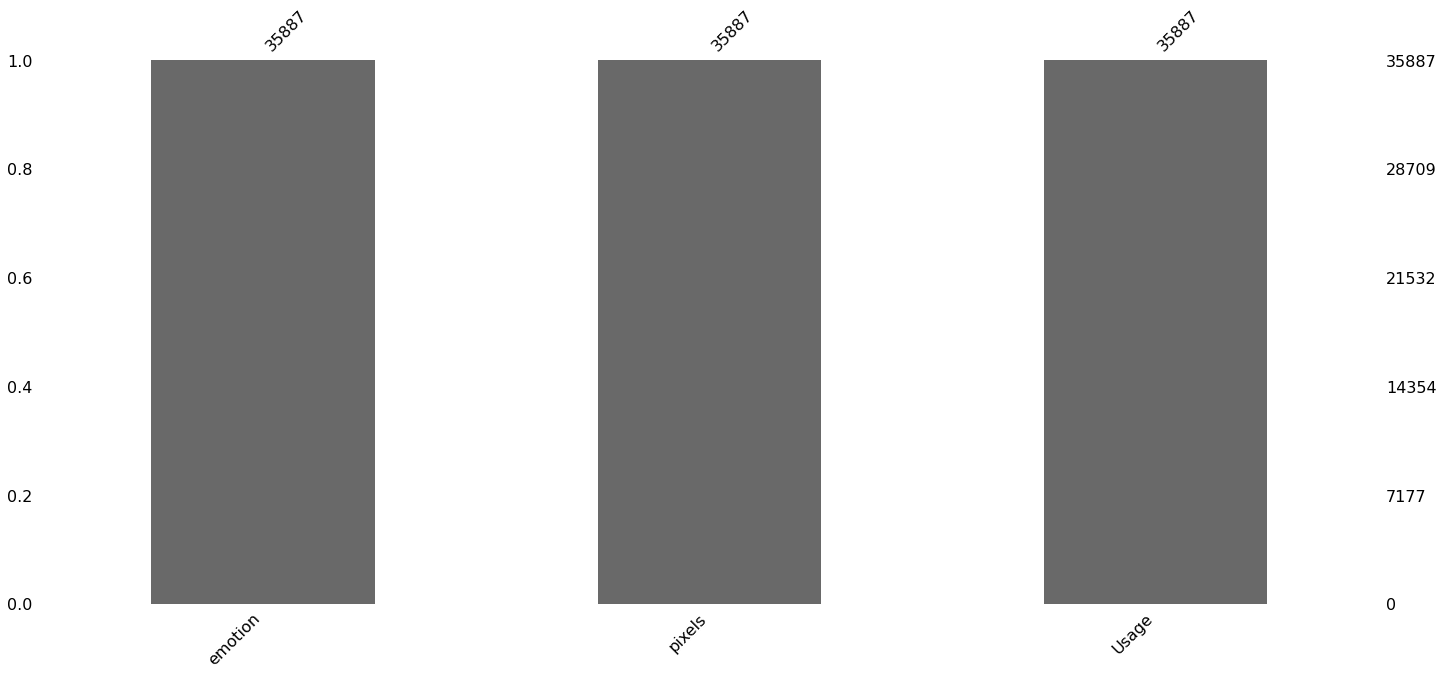

In [ ]:
msno.bar(data)

In [ ]:
def show(img):
    show_image = img.reshape(48,48)

    
    plt.axis('off')
    plt.imshow(show_image, cmap='gray')

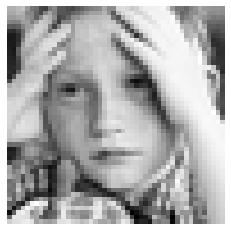

In [ ]:
show(train_images[22222])


In [ ]:
train_labels_flat = train_data["emotion"].values.ravel()
train_labels_count = np.unique(train_labels_flat).shape[0]
print("Different face emotions count by data: %d"%train_labels_count)

Different face emotions count by data: 7


In [ ]:
def dense_of_one_hot(labels_dense, num_classes):
  num_labels = labels_dense.shape[0]
  index_offset = np.arange(num_labels) * num_classes
  # One Hot Time
  labels_one_hot = np.zeros((num_labels, num_classes))
  labels_one_hot.flat[index_offset + labels_dense.ravel()] = 1
  return labels_one_hot

In [ ]:
y_train = dense_of_one_hot(train_labels_flat, train_labels_count)

y_train = y_train.astype(np.uint8)

print(y_train.shape)

(28709, 7)


In [ ]:
np.unique(data["Usage"].values.ravel())

print("Test value count in train set %d"%(len(data[data.Usage == "PublicTest"])))

Test value count in train set 3589


In [ ]:
test_data = data[data.Usage == "PublicTest"]
test_pixels = test_data.pixels.str.split(" ").tolist()

test_pixels = pd.DataFrame(test_pixels, dtype=int)
test_images = test_pixels.values
test_images = test_images.astype(np.float)


print(test_images.shape)

(3589, 2304)


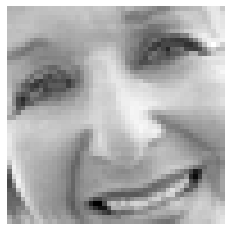

In [ ]:
show(test_images[2021])
# Smiling i hope 2021 will be like this

In [ ]:
test_labels_flat = test_data["emotion"].values.ravel()
test_labels_count = np.unique(test_labels_flat).shape[0]

y_test = dense_of_one_hot(test_labels_flat, test_labels_count)

y_test = y_test.astype(np.uint8)

print(y_test.shape)

(3589, 7)


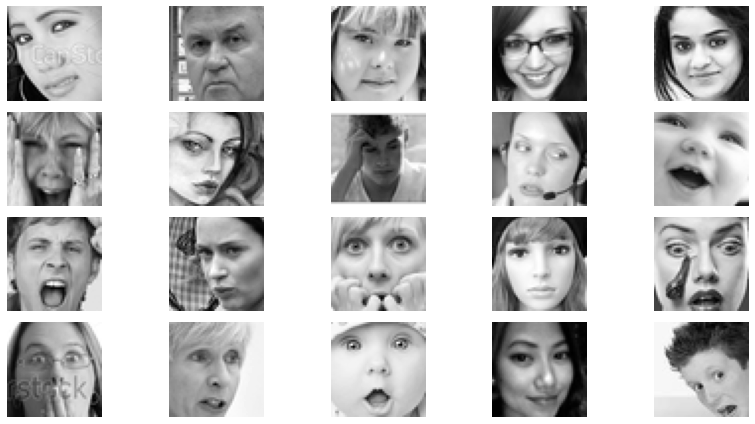

In [ ]:
plt.figure(0, figsize=(12,6))
for i in range(1,21):
  plt.subplot(4, 5, i)
  plt.axis("off")
  image = test_images[i].reshape(48,48)
  plt.imshow(image, cmap = "gray")
plt.tight_layout()
plt.show()


In [ ]:
model = Sequential()

#1. DENSE
model.add(Conv2D(64, 3, data_format="channels_last", kernel_initializer="he_normal", input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))

#2. DENSE

model.add(Conv2D(64, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) 

### 3. DENSE
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))


### 4. DENSE
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))

### 5. DENSE
model.add(Conv2D(32, 3))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.6)) 

### COMPLETE INIT
model.add(Flatten())
model.add(Dense(128))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.6))

### QUIT DENSE

model.add(Dense(7))
model.add(Activation('softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 


model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 46, 46, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 46, 46, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
batch_normalization_1 (Batch (None, 44, 44, 64)        256       
_________________________________________________________________
activation_1 (Activation)    (None, 44, 44, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 64)        0

In [ ]:
x_train = train_images.reshape(-1, 48, 48, 1)
x_test = test_images.reshape(-1, 48, 48, 1)

print('Train:', x_train.shape)
print('Test:', x_test.shape)

Train: (28709, 48, 48, 1)
Test: (3589, 48, 48, 1)


In [ ]:
print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (28709, 7)
Test: (3589, 7)


In [ ]:
toor = "/Klasörler/MyDrive/gdrive/"
checkpointer = ModelCheckpoint(filepath=toor + 'My-Drive/face_model.h5', verbose=1, save_best_only=True)

epochs = 10
batchSize = 100


hist = model.fit(x_train, y_train,
                 epochs=epochs,
                 shuffle=True,
                 batch_size=batchSize,
                 validation_data=(x_test, y_test),
                 callbacks=[checkpointer], verbose=2)
                
# save model to json
model_json = model.to_json()
with open(toor + 'My-Drive/face_model.json', 'w') as json_file:
  json_file.write(model_json)

Epoch 1/10
288/288 - 527s - loss: 1.6976 - accuracy: 0.3351 - val_loss: 1.5170 - val_accuracy: 0.4255

Epoch 00001: val_loss improved from inf to 1.51697, saving model to /Klasörler/MyDrive/gdrive/My-Drive/face_model.h5
Epoch 2/10
288/288 - 526s - loss: 1.5523 - accuracy: 0.3966 - val_loss: 1.4452 - val_accuracy: 0.4427

Epoch 00002: val_loss improved from 1.51697 to 1.44523, saving model to /Klasörler/MyDrive/gdrive/My-Drive/face_model.h5
Epoch 3/10
288/288 - 527s - loss: 1.4621 - accuracy: 0.4340 - val_loss: 1.3589 - val_accuracy: 0.4770

Epoch 00003: val_loss improved from 1.44523 to 1.35894, saving model to /Klasörler/MyDrive/gdrive/My-Drive/face_model.h5
Epoch 4/10
288/288 - 524s - loss: 1.4021 - accuracy: 0.4618 - val_loss: 1.3220 - val_accuracy: 0.4837

Epoch 00004: val_loss improved from 1.35894 to 1.32199, saving model to /Klasörler/MyDrive/gdrive/My-Drive/face_model.h5
Epoch 5/10
288/288 - 538s - loss: 1.3561 - accuracy: 0.4779 - val_loss: 1.2910 - val_accuracy: 0.4996

Epoch

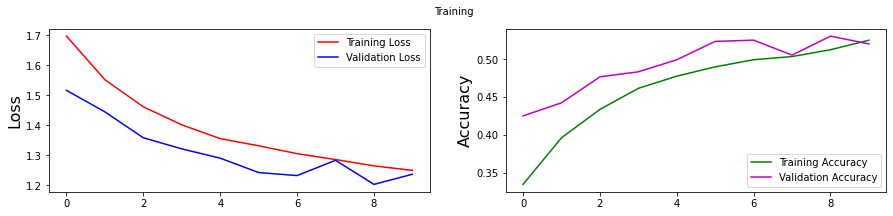

In [ ]:

plt.figure(figsize=(15,3))
plt.subplot(1, 2, 1)
plt.suptitle('Training', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(hist.history['loss'], color ='r', label='Training Loss')
plt.plot(hist.history['val_loss'], color ='b', label='Validation Loss')
plt.legend(loc='upper right')


plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(hist.history['accuracy'], color ='g', label='Training Accuracy')
plt.plot(hist.history['val_accuracy'], color ='m', label='Validation Accuracy')
plt.legend(loc='lower right')

In [ ]:
test = data[["emotion", "pixels"]][data["Usage"] == "PrivateTest"]
test["pixels"] = test["pixels"].apply(lambda im: np.fromstring(im, sep=' '))

test.head()

,emotion,pixels
32298,0,"[170.0, 118.0, 101.0, 88.0, 88.0, 75.0, 78.0, ..."
32299,5,"[7.0, 5.0, 8.0, 6.0, 7.0, 3.0, 2.0, 6.0, 5.0, ..."
32300,6,"[232.0, 240.0, 241.0, 239.0, 237.0, 235.0, 246..."
32301,4,"[200.0, 197.0, 149.0, 139.0, 156.0, 89.0, 111...."
32302,2,"[40.0, 28.0, 33.0, 56.0, 45.0, 33.0, 31.0, 78...."


In [ ]:
x_test_private = np.vstack(test["pixels"].values)
y_test_private = np.array(test["emotion"])

In [ ]:

x_test_private = x_test_private.reshape(-1, 48, 48, 1)
y_test_private = np_utils.to_categorical(y_test_private)
x_test_private.shape, y_test_private.shape

((3589, 48, 48, 1), (3589, 7))

In [ ]:
score = model.evaluate(x_test_private, y_test_private, verbose=0)
print("PrivateTest accuracy rate:", score)

PrivateTest accuracy rate: [1.2121182680130005, 0.5207578539848328]


In [ ]:
from keras.models import load_model
from PIL import Image
from keras.preprocessing import image

In [ ]:
best_model = load_model(toor + 'My-Drive/face_model.h5')


In [ ]:
os.chdir('/Klasörler/MyDrive/gdrive/My-Drive/pictures')


In [ ]:
!ls


 306d5336e2ca763fe1abfdcf9725.jpeg
 9d302ac14334c68155a2.jpeg
 f4e269b1ce05382c8209553e665c.jpeg
'reflect_02e82703-0827-4793-b452-7245bd5a7754 (1).jpeg'
'reflect_f12399ec-810b-4d71-b46b-545a3ec8daa2 (1).jpeg'
 thumbs_b_c_678bb6569b0c6e6a34da869e1fe3e1b9.jpg


In [ ]:
oort = "/Klasörler/MyDrive/gdrive/My-Drive/"
image_path = oort + "pictures/thumbs_b_c_678bb6569b0c6e6a34da869e1fe3e1b9.jpg"

test_image_original = image.load_img(image_path) # 

test_image = image.load_img(image_path, target_size=(48, 48), grayscale=True)
test_data = image.img_to_array(test_image)

test_data = np.expand_dims(test_data, axis=0)
test_data = np.vstack([test_data])

results = best_model.predict(test_data, batch_size=1)
results

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


array([[0.21014808, 0.00684395, 0.13450158, 0.03412788, 0.39401376,
        0.01165317, 0.20871155]], dtype=float32)

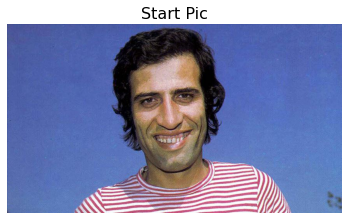

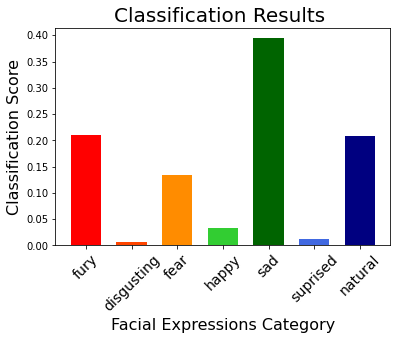

Classification result with the highest rate: sad


In [ ]:
class_names = ['fury', 'disgusting', 'fear', 'happy', 'sad', 'suprised', 'natural']

ind = 0.1+0.6*np.arange(len(class_names))
width = 0.4  

color_list = ['red','orangered','darkorange','limegreen','darkgreen','royalblue','navy']



plt.imshow(test_image_original)
plt.title('Start Pic', fontsize=16)
plt.axis('off')
plt.show()

 

for i in range(len(class_names)):
  plt.bar(ind[i], results[0][i], width, color=color_list[i])

plt.title("Classification Results ", fontsize=20)
plt.xlabel("Facial Expressions Category",fontsize=16)
plt.ylabel("Classification Score",fontsize=16)
plt.xticks(ind, class_names, rotation=45, fontsize=14)
plt.show()


print("Classification result with the highest rate:", class_names[np.argmax(results)])


